In [34]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math
import functions as f

In [35]:
problem = tsplib95.load("kroC100.tsp")
G  = problem.get_graph()
layout = nx.spring_layout(G,seed=0)
arr=np.array(G.nodes)
np.random.shuffle(arr)

In [36]:
def get_edge_list(array):
    res=[]

    for i in range(len(array)-1):
        res.append((array[i],array[i+1]))

    res.append((array[-1],array[0]))

    return res

def get_distance(node1, node2):
    return math.dist(node1['coord'],node2['coord'])

def get_fitness(edge_list):
    fitness=0
    for pair in edge_list:
        fitness += get_distance(G.nodes[pair[0]],G.nodes[pair[1]])
    return fitness

# get_distance(G.nodes[2],G.nodes[2])
edge_list = get_edge_list(arr)
get_fitness(edge_list)


167499.73305092944

In [37]:
print(type(arr))
print(get_edge_list([i[0] for i in edge_list]))

<class 'numpy.ndarray'>
[(100, 3), (3, 79), (79, 37), (37, 48), (48, 10), (10, 73), (73, 11), (11, 72), (72, 65), (65, 69), (69, 51), (51, 88), (88, 9), (9, 54), (54, 24), (24, 83), (83, 74), (74, 66), (66, 34), (34, 63), (63, 33), (33, 15), (15, 61), (61, 62), (62, 91), (91, 94), (94, 87), (87, 84), (84, 58), (58, 47), (47, 45), (45, 8), (8, 68), (68, 77), (77, 26), (26, 29), (29, 53), (53, 49), (49, 71), (71, 25), (25, 50), (50, 44), (44, 6), (6, 19), (19, 40), (40, 4), (4, 97), (97, 57), (57, 28), (28, 18), (18, 43), (43, 86), (86, 42), (42, 52), (52, 1), (1, 92), (92, 64), (64, 31), (31, 35), (35, 23), (23, 78), (78, 41), (41, 14), (14, 99), (99, 96), (96, 80), (80, 59), (59, 98), (98, 38), (38, 93), (93, 16), (16, 81), (81, 90), (90, 70), (70, 89), (89, 22), (22, 30), (30, 95), (95, 76), (76, 82), (82, 36), (36, 55), (55, 5), (5, 85), (85, 20), (20, 32), (32, 2), (2, 67), (67, 27), (27, 21), (21, 56), (56, 46), (46, 17), (17, 60), (60, 75), (75, 39), (39, 13), (13, 12), (12, 7), (

In [38]:
dictionary = dict()
G.nodes[1]['coord']
for i in range(1,len(G.nodes)+1):
    dictionary[i] = G.nodes[i]['coord']
# print (dictionary)

20750.762503687547


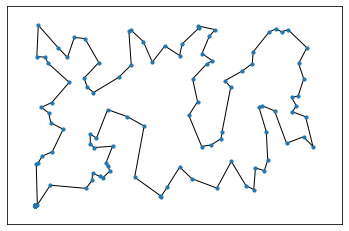

In [39]:
solution = tsplib95.load("kroC100.opt.tour").tours[0]
solution = get_edge_list(solution)
nx.draw_networkx(G, with_labels=False, node_size=10, edgelist=[])
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=10, edgelist=solution)
print(get_fitness(solution))

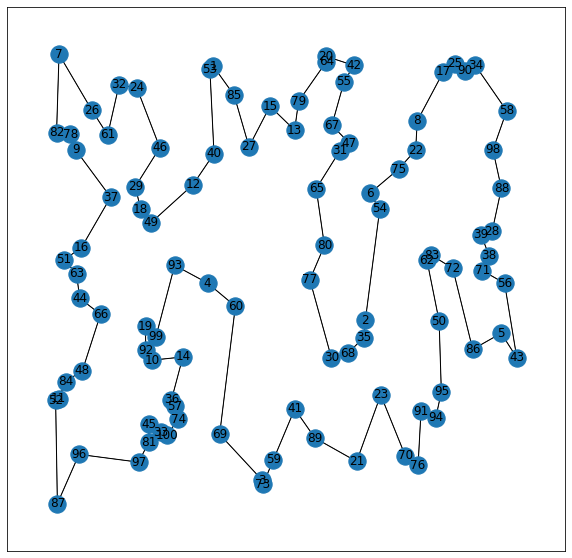

In [40]:
fig, axs = plt.subplots(1, figsize=(10,10))
nx.draw_networkx(G, pos=dictionary, with_labels=True, edgelist=solution, ax=axs)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs)
nx.draw_networkx_nodes(G, pos=dictionary, node_size=100,ax=axs)


In [41]:
p1 = f.generate_random_inividual(G)
p2 = f.generate_random_inividual(G)

child = f.crossover(p1.get_path(), p2.get_path())

f.plot_figure(G, p1.edge_list,name="parent1.jpg")
f.plot_figure(G, p2.edge_list,name="parent2.jpg")
f.plot_figure(G, f.get_edge_list(child),name="child.jpg")


<Figure size 432x288 with 0 Axes>